#Read the data as an appropriate Time Series data and plot the data.

In [2]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
#READING THE ROSE CSV AS A TIME SERIES DATA
df_r = pd.read_csv('/content/Rose.csv', parse_dates = ['YearMonth'])
df_r.head(5)

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [146]:
df_r.tail(5)

,YearMonth,Rose
182,1995-03-01,45.0
183,1995-04-01,52.0
184,1995-05-01,28.0
185,1995-06-01,40.0
186,1995-07-01,62.0


In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

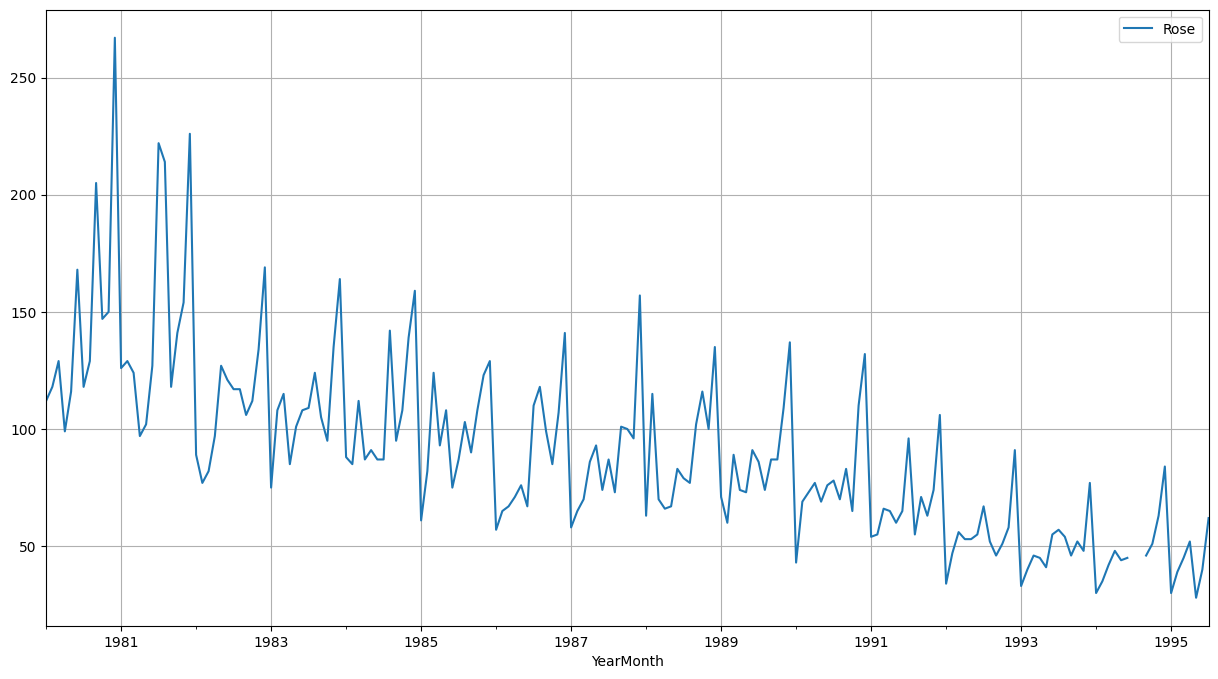

In [ ]:
#plotting the Rose time series data
df_r.plot(x = ('YearMonth'), y = ('Rose'), grid=True);

#Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [149]:
#Check data types
df_r.dtypes

YearMonth    datetime64[ns]
Rose                float64
dtype: object

In [ ]:
round(df_r.describe(),3)

,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


In [12]:
#filling null variables
df_r.Rose.fillna (df_r.Rose.median(), inplace=True)

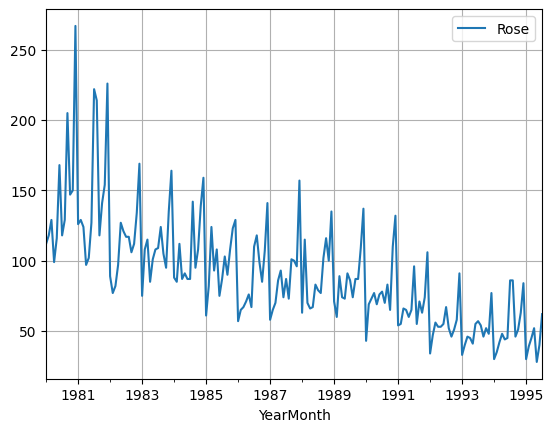

In [148]:
#plotting the Rose time series data
df_r.plot(x = ('YearMonth'), y = ('Rose'), grid=True);

In [ ]:
round(df_r.describe(),3)

,Rose
count,187.000
mean,90.348
std,38.967
min,28.000
25%,63.000
50%,86.000
75%,111.000
max,267.000


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#additive decomposition for Rose data
df_r_add_decompose = seasonal_decompose(df_r['Rose'], model = 'additive', period = 12)

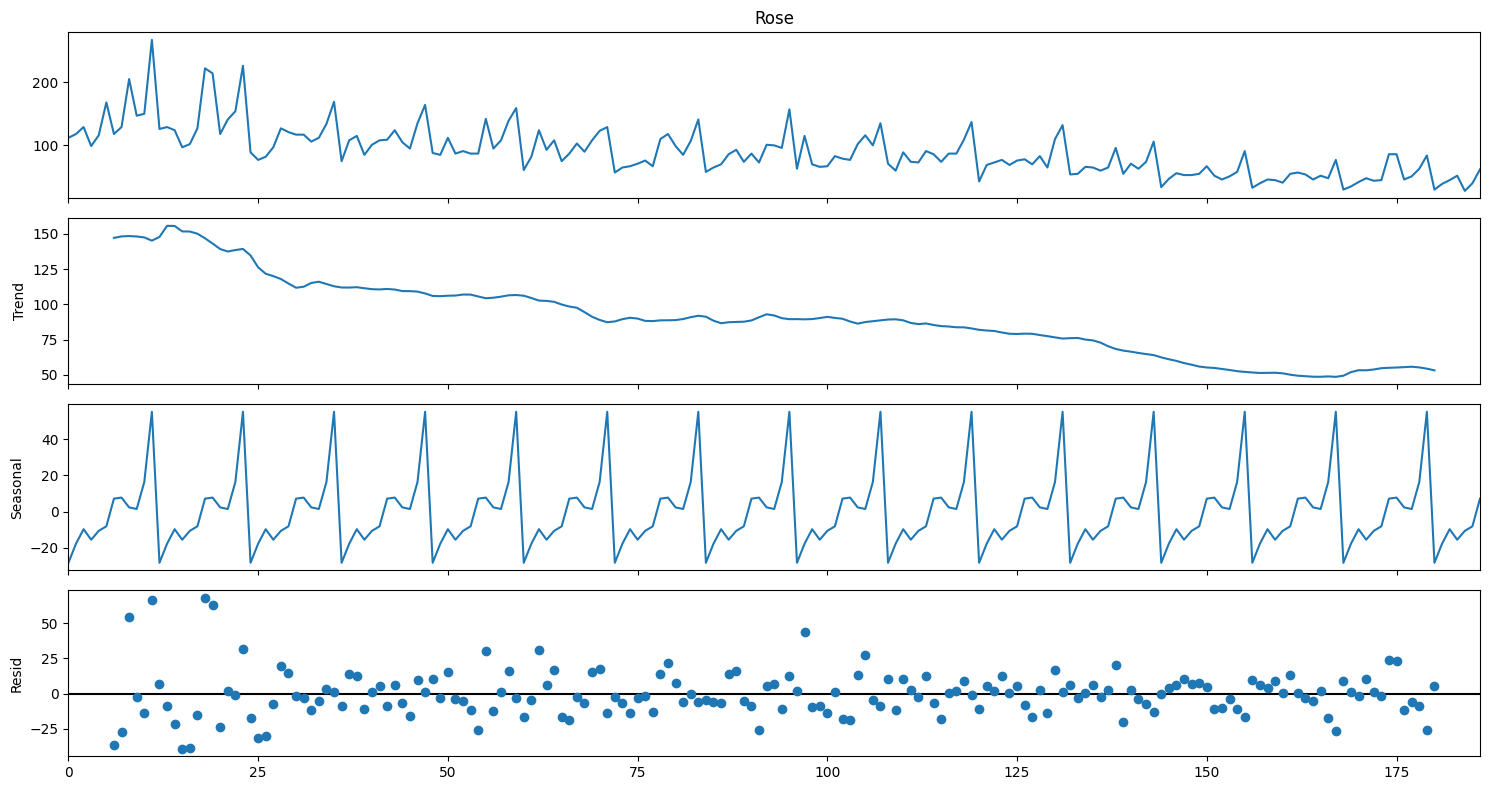

In [ ]:
df_r_add_decompose.plot()
plt.show()

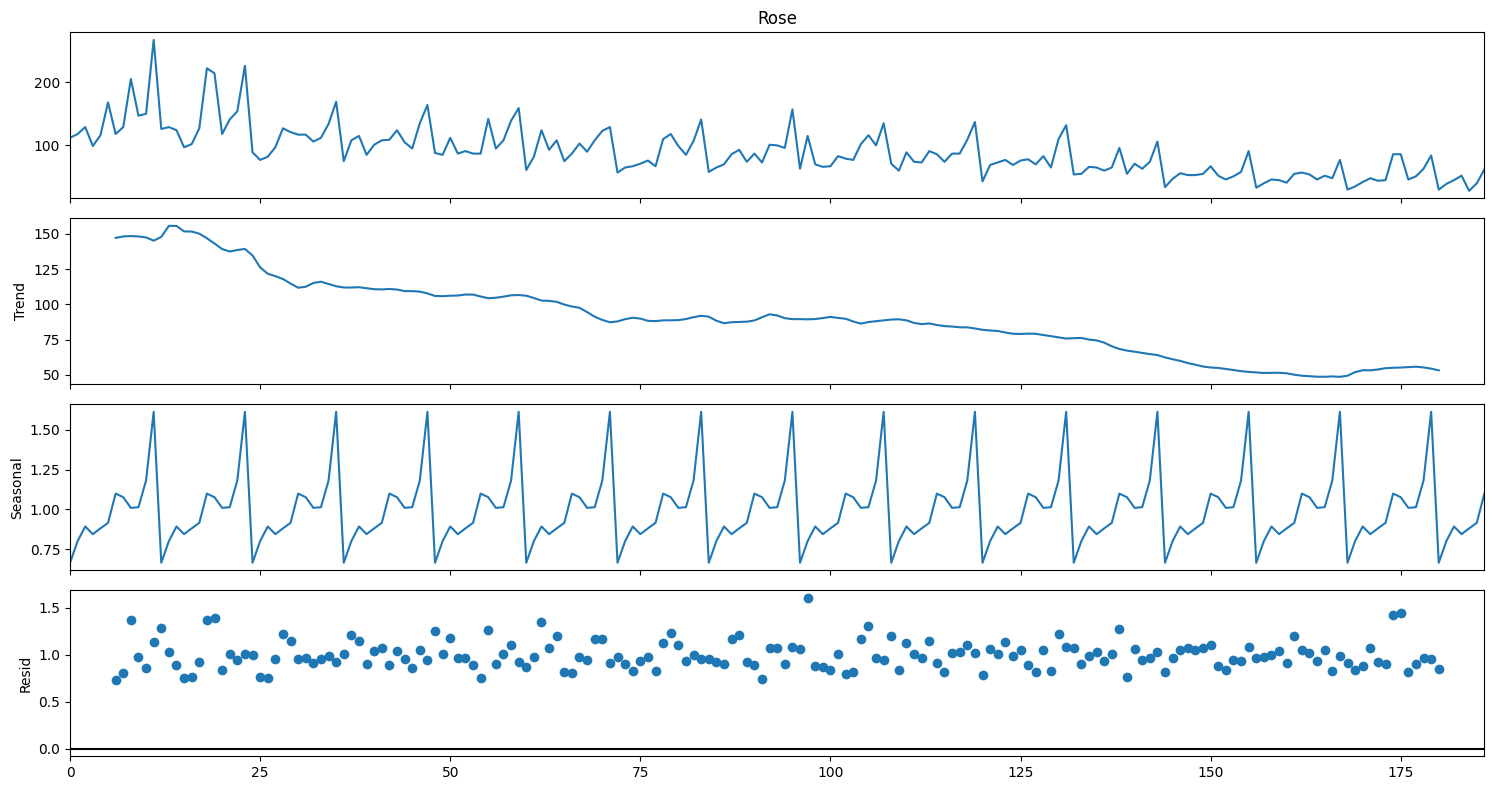

In [ ]:
#seasonal decompose for rose data
df_r_mul_decompose = seasonal_decompose(df_r['Rose'], model = "multiplicative", period = 12)
df_r_mul_decompose.plot()
plt.show()

# Split the data into training and test. The test data should start in 1991.

In [11]:
r_train = df_r[df_r['YearMonth']<'1991']
r_test = df_r[df_r['YearMonth']>'1991']

In [ ]:
# Printing the Rose Data
print('Training Data')
display(r_train.head())
print('Test Data')
display(r_test.head())

Training Data


,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


Test Data


,YearMonth,Rose
133,1991-02-01,55.0
134,1991-03-01,66.0
135,1991-04-01,65.0
136,1991-05-01,60.0
137,1991-06-01,65.0


#Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

In [ ]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

Simple Exponential Smoothing with additive errors

In [ ]:
SES_train= r_train.copy()
SES_test= r_test.copy()

In [ ]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [ ]:
model_SES_autofit = model_SES.fit(optimized=True)

In [ ]:
model_SES_autofit.params

{'smoothing_level': 0.12362013466760018,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
SES_predict = model_SES_autofit.forecast(steps=len(SES_test))
SES_predict.head()

132    87.983765
133    87.983765
134    87.983765
135    87.983765
136    87.983765
dtype: float64

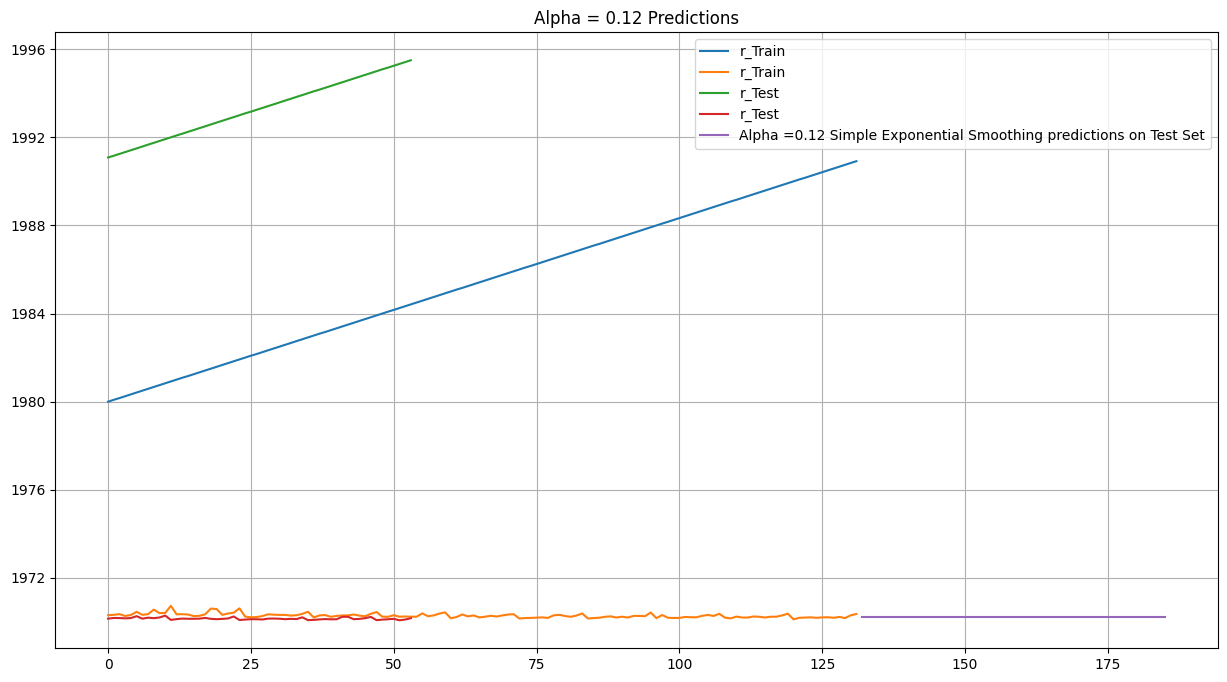

In [ ]:
plt.plot(r_train, label='r_Train')
plt.plot(r_test, label='r_Test')

plt.plot(SES_predict, label='Alpha =0.12 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.12 Predictions');

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [ ]:
SES_df = pd.DataFrame(SES_predict)
SES_df.head()

,0
132,87.983765
133,87.983765
134,87.983765
135,87.983765
136,87.983765


In [ ]:
from sklearn import metrics
rmse_model5_test_1 = metrics.mean_squared_error(r_test['Rose'],SES_df[0],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))

For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 36.759


Double Exponential Smoothing

In [ ]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(r_train['Rose'],initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 5.448169774560283e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 137.81762949544608, 'initial_trend': -0.4943507283995123, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
DES_predict =  model_DES.forecast(len(r_test))
DES_predict.head()

132    72.068983
133    71.574632
134    71.080281
135    70.585930
136    70.091580
dtype: float64

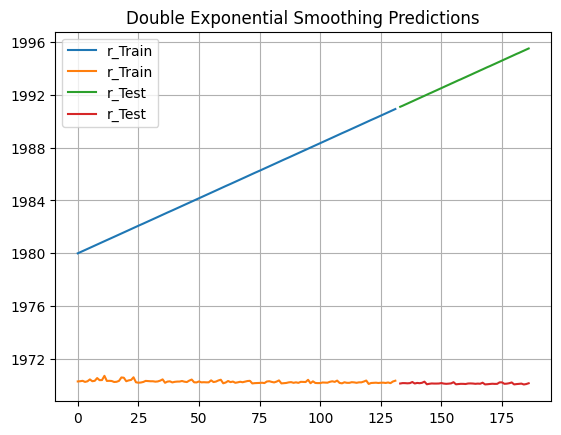

In [ ]:
plt.plot(r_train, label='r_Train')
plt.plot(r_test, label='r_Test')



plt.legend(loc='best')
plt.grid()
plt.title('Double Exponential Smoothing Predictions');

In [ ]:
DES_df = pd.DataFrame(DES_predict)
DES_df.head(3)

,0
132,72.068983
133,71.574632
134,71.080281


In [ ]:
print('DES RMSE:',mean_squared_error(r_test['Rose'], DES_df[0],squared=False))

DES RMSE: 16.699558176313356


Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [ ]:
TES_train = r_train.copy()
TES_test = r_test.copy()

In [ ]:
TES_train.index = pd.DatetimeIndex(TES_train.index).to_period('M')
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')


In [ ]:
model_TES_autofit = model_TES.fit()

In [ ]:
model_TES_autofit.params

{'smoothing_level': 0.07736040004765096,
 'smoothing_trend': 0.03936496779735522,
 'smoothing_seasonal': 0.0008375039104357999,
 'damping_trend': nan,
 'initial_level': 156.90674503596637,
 'initial_trend': -0.9061396720042346,
 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
        0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
        1.19783562, 1.6514144 ]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
TES_predict =  model_TES_autofit.forecast(len(TES_test))
TES_predict.head()

NameError: ignored

In [ ]:
print('TES RMSE:',mean_squared_error(TES_test['Rose'],TES_predict.values,squared=False))

TES RMSE: 74.00423093211162


Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [ ]:
# Initializing the Double Exponential Smoothing Model

model_TES_am = ExponentialSmoothing(TES_train['Rose'],trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07736040004765096, 'smoothing_trend': 0.03936496779735522, 'smoothing_seasonal': 0.0008375039104357999, 'damping_trend': nan, 'initial_level': 156.90674503596637, 'initial_trend': -0.9061396720042346, 'initial_seasons': array([0.7142168 , 0.80982439, 0.88543128, 0.77363782, 0.87046319,
       0.94699283, 1.04196135, 1.11012703, 1.04835489, 1.0276963 ,
       1.19783562, 1.6514144 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [ ]:
TES_predict_am =  model_TES_am.forecast(len(TES_test))
TES_predict_am.head()

1970-02    125.652318
1970-03    135.910617
1970-04    117.543847
1970-05    129.745176
1970-06    138.975151
Freq: M, dtype: float64

In [ ]:
print('TES_am RMSE:',mean_squared_error(TES_test['Rose'],TES_predict_am.values,squared=False))

TES_am RMSE: 74.00423093211162


LINEAR REGRESSION

In [13]:
LinearRegression_train= r_train.copy()
LinearRegression_test= r_test.copy()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()

In [ ]:
LinearRegression_test[['YearMonth']]= LinearRegression_test[['YearMonth']].astype(int)

In [ ]:
lr.fit(LinearRegression_train[['YearMonth']],LinearRegression_train['Rose'])

In [ ]:
lr.fit(LinearRegression_train[['YearMonth']],LinearRegression_train['Rose'].values)

In [20]:
df_r = df_r.set_index('YearMonth')

In [ ]:
test_predictions_model = lr.predict(LinearRegression_test[['YearMonth']])
plt.plot(test_predictions_model, label='Regression On Time_Test Data')

plt.plot(r_train['Rose'], label='Train')
plt.plot(r_test['Rose'], label='Test')

plt.legend(loc='best')
plt.grid();

In [22]:
from sklearn import metrics

In [ ]:
rmse_model1_test = metrics.mean_squared_error(LinearRegression_test[['YearMonth']],test_predictions_model,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.2f" %(rmse_model1_test))

MOVING AVERAGE

In [ ]:
MovingAverage = df_r.copy()
MovingAverage.head()

,YearMonth,Rose
0,1980-01-01,112.0
1,1980-02-01,118.0
2,1980-03-01,129.0
3,1980-04-01,99.0
4,1980-05-01,116.0


In [ ]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,YearMonth,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
0,1980-01-01,112.0,NaN,NaN,NaN,NaN
1,1980-02-01,118.0,115.0,NaN,NaN,NaN
2,1980-03-01,129.0,123.5,NaN,NaN,NaN
3,1980-04-01,99.0,114.0,114.5,NaN,NaN
4,1980-05-01,116.0,107.5,115.5,NaN,NaN


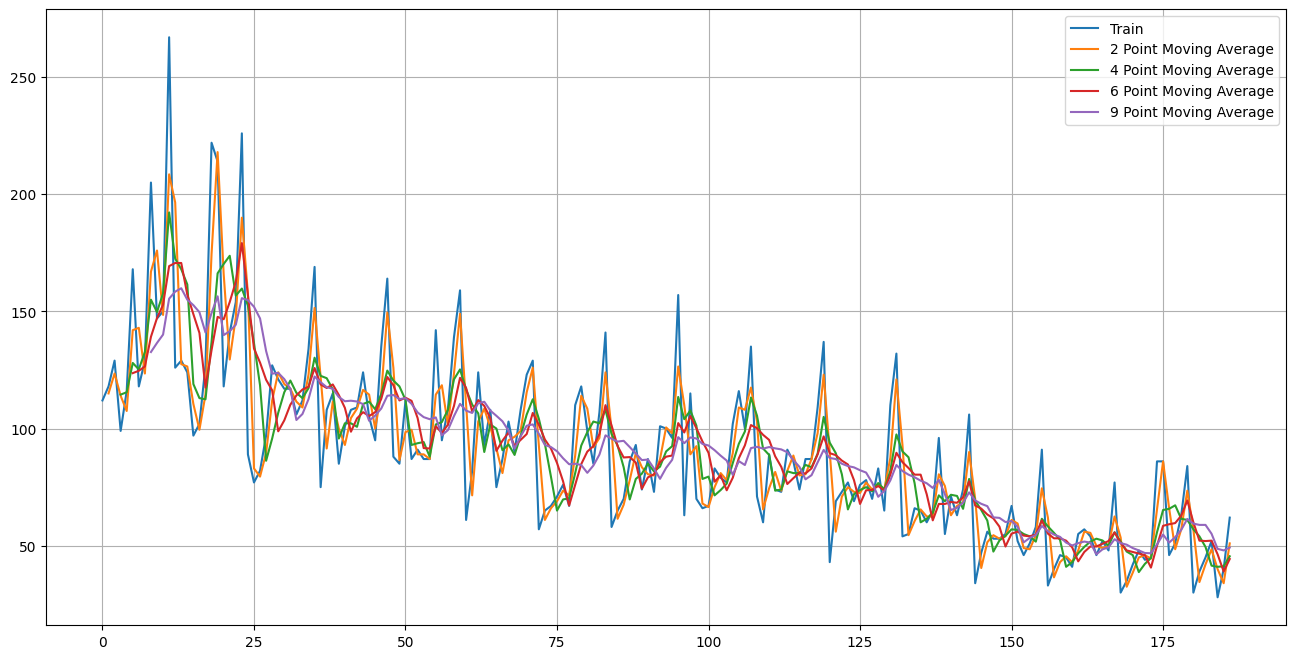

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [ ]:
trailing_MovingAverage_train=MovingAverage[df_r['YearMonth']<'1991']
trailing_MovingAverage_test=MovingAverage[df_r['YearMonth']>'1991']

In [ ]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(r_test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(r_test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(r_test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(r_test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data, RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 11.064
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 14.922
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.234
For 9 point Moving Average Model forecast on the Training Data, RMSE is 15.862 


NAIVE MODEL

In [ ]:
NaiveModel_train = r_train.copy()
NaiveModel_test = r_test.copy()

In [ ]:
NaiveModel_test['naive'] = np.asarray(r_train['Rose'])[len(np.asarray(r_train['Rose']))-1]
NaiveModel_test['naive'].head()

133    132.0
134    132.0
135    132.0
136    132.0
137    132.0
Name: naive, dtype: float64

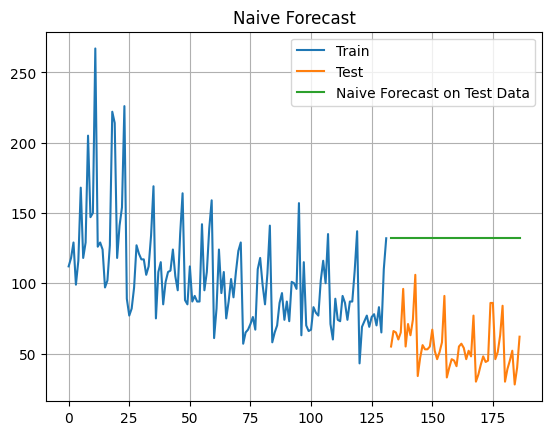

In [ ]:
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(r_test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [ ]:
rmse_model2_test = metrics.mean_squared_error(r_test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.494


SIMPLE AVERAGE

In [122]:
SimpleAverage_train = r_train.copy()
SimpleAverage_test = r_test.copy()

In [123]:
SimpleAverage_test['mean_forecast'] = r_train['Rose'].mean()
SimpleAverage_test.head()

,YearMonth,Rose,mean_forecast
133,1991-02-01,55.0,104.939394
134,1991-03-01,66.0,104.939394
135,1991-04-01,65.0,104.939394
136,1991-05-01,60.0,104.939394
137,1991-06-01,65.0,104.939394


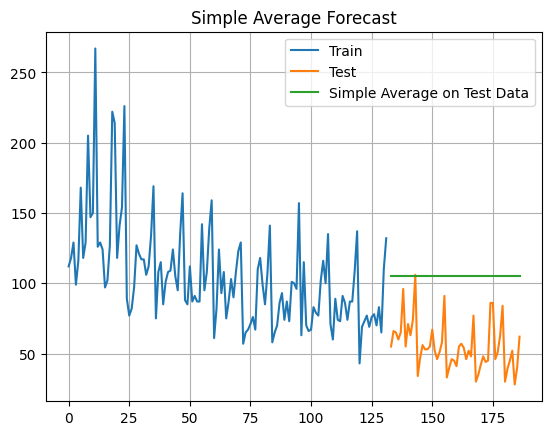

In [124]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [125]:
rmse_model3_test = metrics.mean_squared_error(r_test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.396


# Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
rose = df_r['Rose']

Text(0, 0.5, 'Rose')

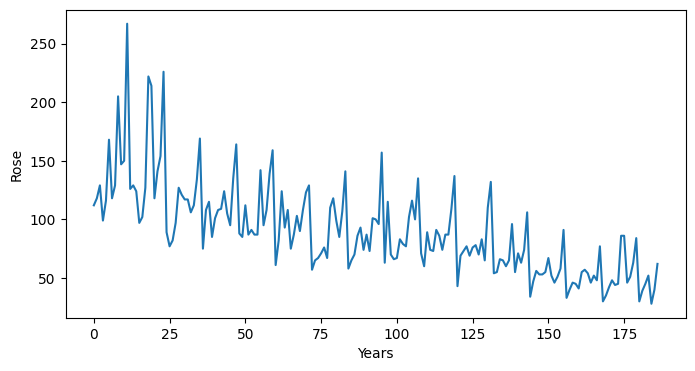

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rose)
plt.xlabel('Years')
plt.ylabel('Rose')

In [ ]:
dftest = adfuller(rose)#python implementation of dicky fuller test
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.933
DF test p-value is 0.3167


Text(0, 0.5, 'Rose')

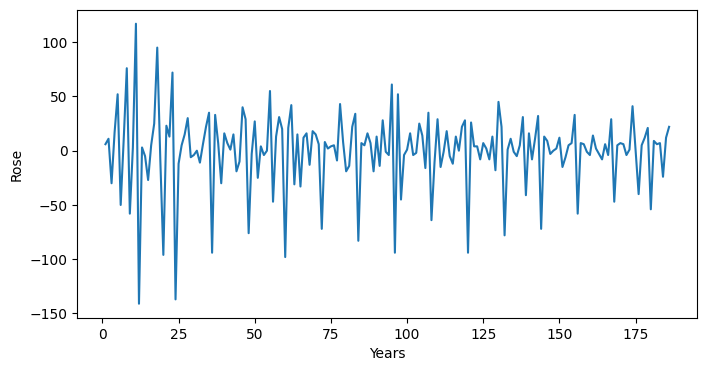

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(rose.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Rose')

Text(0, 0.5, 'log (Rose)')

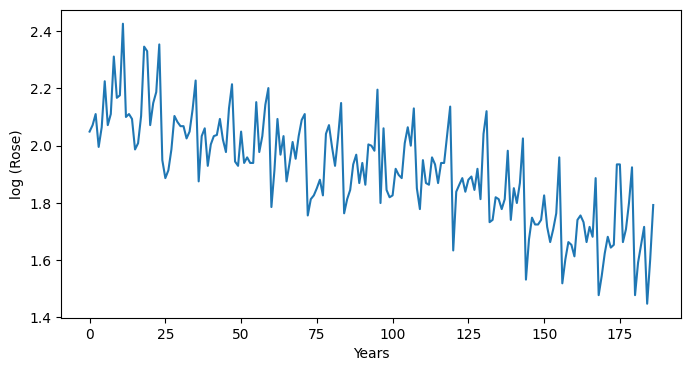

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(rose))
plt.xlabel('Years')
plt.ylabel('log (Rose)')

Text(0, 0.5, 'Differenced Log (rose)')

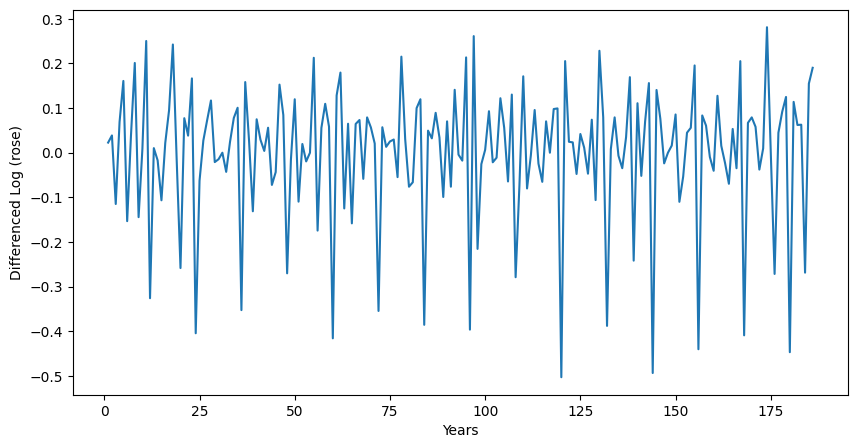

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(rose).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (rose)')

# Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [26]:
p= range(1,4)
q = range(1, 4)

In [27]:
d= range(0,2)

#Generate all different combinations of p with d=0 and q=0 triplets for AR model building
pdq_ar = list(itertools.product(p, range(1), range(1)))

#Generate all different combinations of p,q with d=0 triplets for ARMA model building
pdq_arma = list(itertools.product(p, range(1),q))

#Generate all different combinations of p, d and q triplets for ARIMA model building
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal P,D,Q triplets for SARIMA model building
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [28]:
pdq_ar

[(1, 0, 0), (2, 0, 0), (3, 0, 0)]

In [29]:
pdq_arma

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3)]

In [30]:
pdq

[(1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3)]

In [31]:
seasonal_pdq

[(1, 0, 1, 12),
 (1, 0, 2, 12),
 (1, 0, 3, 12),
 (1, 1, 1, 12),
 (1, 1, 2, 12),
 (1, 1, 3, 12),
 (2, 0, 1, 12),
 (2, 0, 2, 12),
 (2, 0, 3, 12),
 (2, 1, 1, 12),
 (2, 1, 2, 12),
 (2, 1, 3, 12),
 (3, 0, 1, 12),
 (3, 0, 2, 12),
 (3, 0, 3, 12),
 (3, 1, 1, 12),
 (3, 1, 2, 12),
 (3, 1, 3, 12)]

In [32]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [33]:
from statsmodels.tsa.arima.model import ARIMA
train_sales_ts_log = np.log10(r_train['Rose'])

for param in pdq:
    ARIMA_model = ARIMA(train_sales_ts_log,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(1, 0, 1) - AIC:-182.64430155082644
ARIMA(1, 0, 2) - AIC:-185.36591681352118
ARIMA(1, 0, 3) - AIC:-183.91732065335736
ARIMA(1, 1, 1) - AIC:-186.10111851430446
ARIMA(1, 1, 2) - AIC:-186.19506526990796
ARIMA(1, 1, 3) - AIC:-184.30629938606714
ARIMA(2, 0, 1) - AIC:-184.68400607673482
ARIMA(2, 0, 2) - AIC:-184.73080174806404
ARIMA(2, 0, 3) - AIC:-182.8477488947725
ARIMA(2, 1, 1) - AIC:-184.82917472630797
ARIMA(2, 1, 2) - AIC:-184.32051122865585


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 3) - AIC:-182.3414973471592
ARIMA(3, 0, 1) - AIC:-183.365017672823
ARIMA(3, 0, 2) - AIC:-182.86395706443562


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3, 0, 3) - AIC:-180.7621550489294
ARIMA(3, 1, 1) - AIC:-183.32918568754513
ARIMA(3, 1, 2) - AIC:-182.38811978089086
ARIMA(3, 1, 3) - AIC:-180.66148047809696


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
4,"(1, 1, 2)",-186.195065
3,"(1, 1, 1)",-186.101119
1,"(1, 0, 2)",-185.365917
9,"(2, 1, 1)",-184.829175
7,"(2, 0, 2)",-184.730802


In [35]:
best_model = ARIMA(train_sales_ts_log,order = (1, 1, 2))
best_results = best_model.fit()

In [36]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  97.098
Date:                Sun, 03 Sep 2023   AIC                           -186.195
Time:                        13:58:12   BIC                           -174.694
Sample:                             0   HQIC                          -181.522
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5038      0.288     -1.750      0.080      -1.068       0.061
ma.L1         -0.2168      0.266     -0.814      0.416      -0.739       0.305
ma.L2         -0.6340      0.222     -2.862      0.0

In [37]:
pred99 = best_results.get_forecast(steps=len(r_test), alpha=0.1)#forecasting values

In [38]:
pred_dynamic = best_results.get_prediction(dynamic=True, full_results=True)

In [39]:
rose_forecasted = pred_dynamic.predicted_mean
testCopy1 = r_test.copy()
testCopy1['rose_forecasted'] = np.power(10, pred99.predicted_mean)

In [40]:
mse = ((testCopy1['Rose'] - testCopy1['rose_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 33.838


In [41]:
testCopy1

,YearMonth,Rose,rose_forecasted
132,1991-01,54.0,86.087343
133,1991-02,55.0,82.931987
134,1991-03,66.0,84.506897
135,1991-04,65.0,83.709770
136,1991-05,60.0,84.110410
137,1991-06,65.0,83.908332
138,1991-07,96.0,84.010077
139,1991-08,55.0,83.958803
140,1991-09,71.0,83.984630
141,1991-10,63.0,83.971618


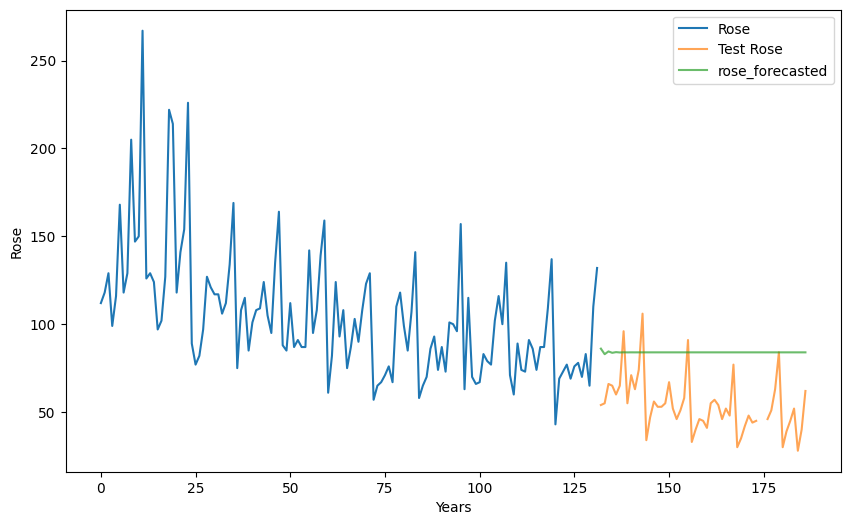

In [91]:
axis = r_train['Rose'].plot(label='Rose', figsize=(10, 6))
testCopy1['Rose'].plot(ax=axis, label='Test Rose', alpha=0.7)
testCopy1['rose_forecasted'].plot(ax=axis, label='rose_forecasted', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()
plt.close()

# Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [42]:
differenced_series = df_r['Rose'].diff().dropna()

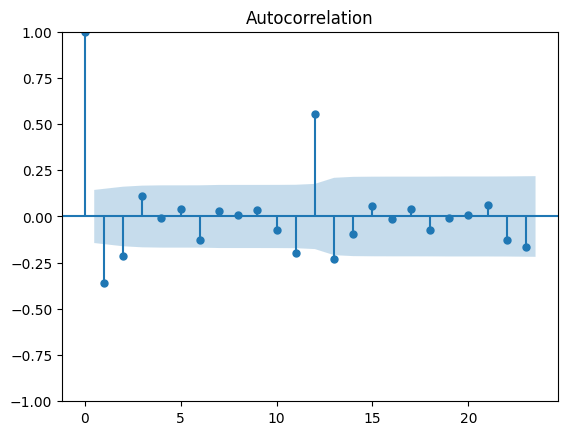

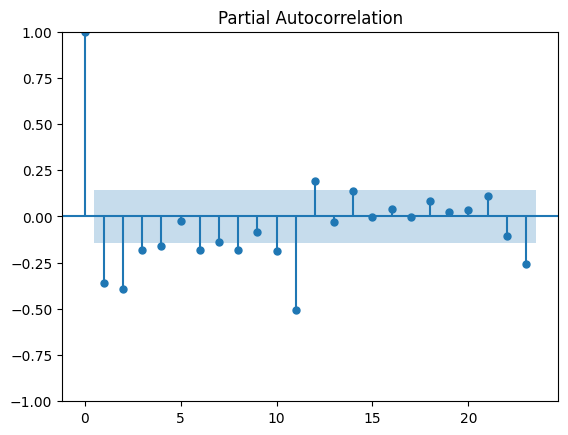

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(differenced_series)
plt.show()

plot_pacf(differenced_series)
plt.show()

In [60]:
p, d, q = 1, 1, 2  # Replace with your chosen values
P, D, Q, s = 1, 1, 2, 12  # Replace with your chosen values

sarima_model = sm.tsa.SARIMAX(df_r['Rose'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [73]:
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Extract forecast values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

In [80]:
df_r['YearMonth'] = pd.to_datetime(df_r['YearMonth'])  # Ensure 'Date' column is in datetime format
df_r.set_index('YearMonth', inplace=True)

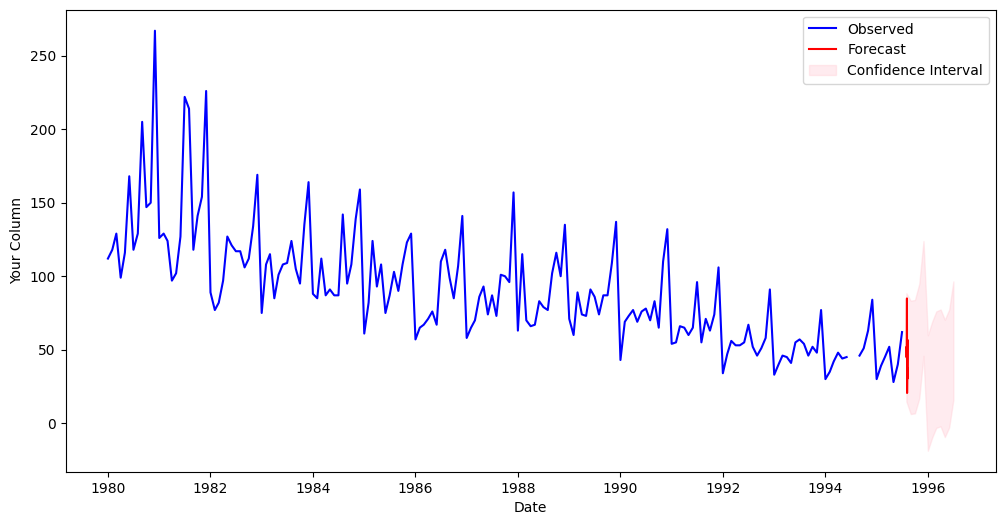

In [88]:
forecast_mean.index = pd.date_range(start=forecast_mean.index[0], periods=len(forecast_mean), freq='D', tz='UTC')

plt.figure(figsize=(12, 6))
plt.plot(df_r.index, df_r['Rose'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean.values, color='red', label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Your Column')
plt.legend()
plt.show()

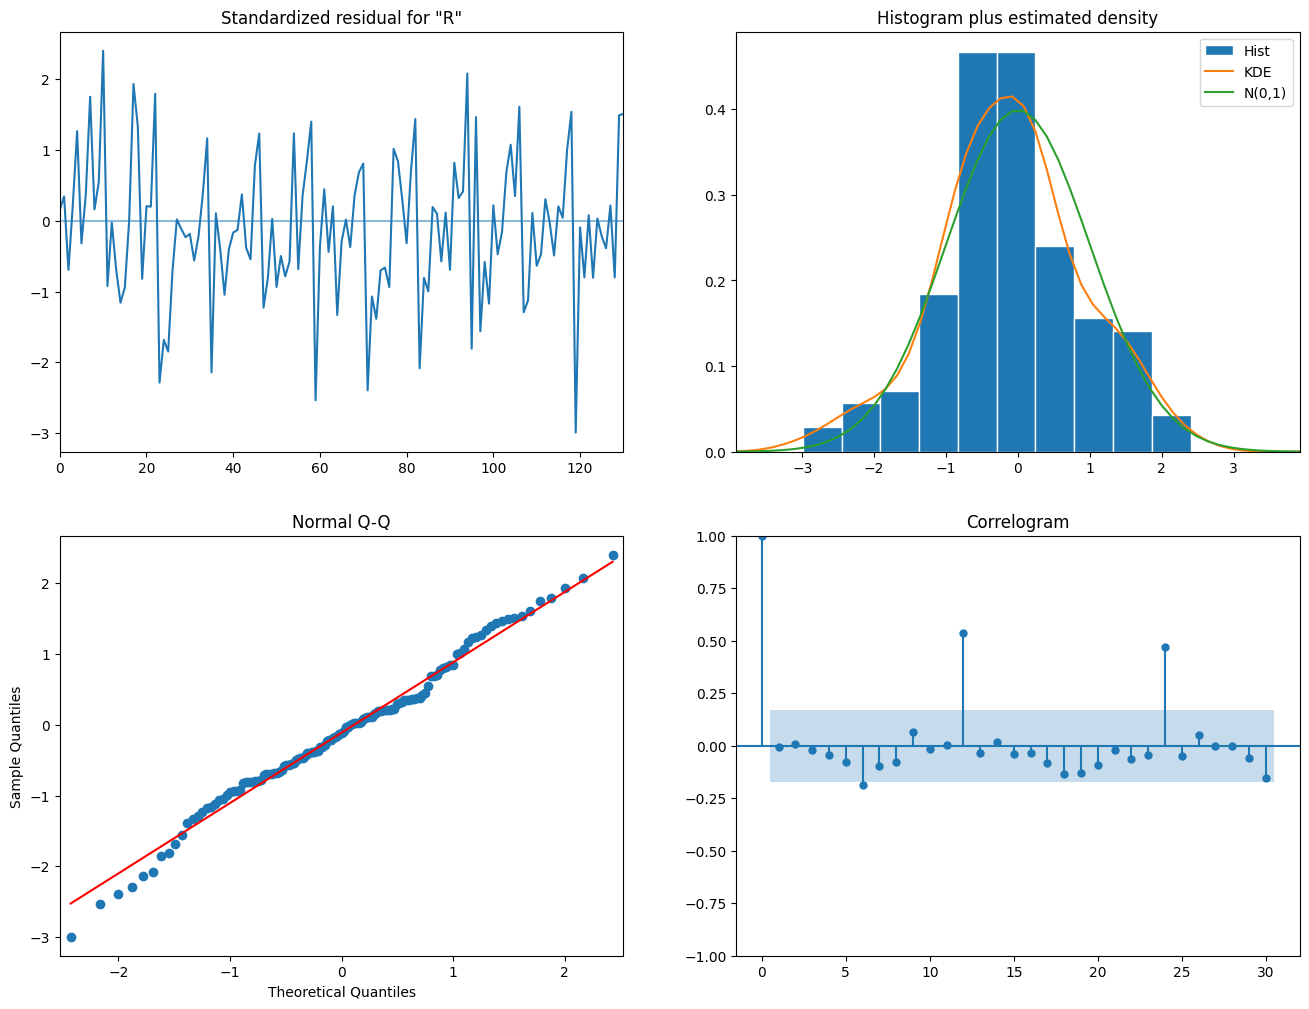

In [93]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()